<a href="https://colab.research.google.com/github/Fabio-marqs/analise-cafe-sono/blob/main/analise_cafe_sono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise como o consumo de café se relaciona com aspectos de saúde.

Esta é uma analise de um conjunto de dados com informações sobre idade, consumo de café, ingestão de cafeína, estresse, IMC, horas de sono e outros fatores, com o objetivo de avaliar como o consumo de café influencia a qualidade do sono.

O Conjunto de dados foi obtido a partir de uma pesquisa que relaciona consumo de café, hábitos de sono e condições de saúde: [Global Coffee Health Dataset](https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset)

# 1. Análise Exploratória de Dados (EDA)

---



Importando as bibliotecas necessárias e carregando a base de dados para
realizar uma análise exploratória completa, identificando padrões e
potenciais problemas nos dados.

Verificando dimensões, colunas, tipos de dados, nulos e duplicados e gerando estatísticas descritivas iniciais


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Lendo dados
df = pd.read_csv("/content/synthetic_coffee_health_10000(in).csv")

In [ ]:
#visualizando os dados
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
#verificando dimensões
df.shape

(10000, 16)

In [ ]:
#verificando colunas
df.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [ ]:
#verificando tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

Checando os valores únicos de cada coluna

In [ ]:
df.apply(pd.Series.unique)



,0
ID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Age,"[40, 33, 42, 53, 32, 44, 29, 41, 37, 18, 28, 2..."
Gender,"[Male, Female, Other]"
Country,"[Germany, Brazil, Spain, Mexico, France, Canad..."
Coffee_Intake,"[3.5, 1.0, 5.3, 2.6, 3.1, 3.4, 2.7, 4.5, 1.7, ..."
Caffeine_mg,"[328.1, 94.1, 503.7, 249.2, 298.0, 326.4, 252...."
Sleep_Hours,"[7.5, 6.2, 5.9, 7.3, 5.3, 6.4, 7.8, 5.5, 7.1, ..."
Sleep_Quality,"[Good, Fair, Excellent, Poor]"
BMI,"[24.9, 20.0, 22.7, 24.7, 24.1, 27.0, 24.3, 15...."
Heart_Rate,"[78, 67, 59, 71, 76, 82, 58, 62, 60, 69, 66, 8..."


In [ ]:
df.nunique()

,0
ID,10000
Age,59
Gender,3
Country,20
Coffee_Intake,78
Caffeine_mg,4277
Sleep_Hours,71
Sleep_Quality,4
BMI,220
Heart_Rate,58


## 1.1 identificando e tratando dados duplicados e nulos.

1.1.1 Identificando e tratando dados duplicados

In [ ]:
df.duplicated().sum()

np.int64(0)

Não há dados duplicados.

1.1.2 Identificando e tratando dados nulos

In [ ]:
df.isna().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


O dataset tem 5941 dados nulos na coluna Health_Issues (problemas de saúde), presumidamente referente às pessoas que não possuem nenhum problema de saúde.

In [ ]:
#substituindo o valor nulo por uma string:
df['Health_Issues'] = df['Health_Issues'].fillna('None')

In [ ]:
df.isna().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


## 1.2 Estatísticas descritivas iniciais.

In [ ]:
# Consumo médio de café por país
consumo_pais = df.groupby('Country')[['Coffee_Intake', 'Caffeine_mg']].mean()
consumo_pais.sort_values(by='Coffee_Intake', ascending=False)

,Coffee_Intake,Caffeine_mg
Country,,
Spain,2.599794,247.004733
Norway,2.588145,246.030210
UK,2.582274,245.165125
China,2.574664,244.727639
USA,2.563393,243.468080
Brazil,2.547588,242.079386
Australia,2.544266,241.930785
Switzerland,2.540400,241.336000
Japan,2.533902,240.598507


In [ ]:
# Average coffee intake by gender
consumo_genero = df.groupby('Gender')[['Coffee_Intake', 'Caffeine_mg']].mean()
consumo_genero.sort_values(by='Coffee_Intake', ascending=False)

,Coffee_Intake,Caffeine_mg
Gender,,
Male,2.522208,239.638026
Female,2.497720,237.311698
Other,2.489823,236.823009


Em diferentes países, o consumo médio de café varia ligeiramente, entre 2,4 e 2,6 xícaras por dia e 230–247 mg de cafeína, indicando padrões de consumo relativamente uniformes em todo o mundo. Espanha, Noruega e Reino Unido apresentam médias ligeiramente mais altas, enquanto Itália e Bélgica apresentam médias mais baixas, provavelmente refletindo diferenças no tamanho da porção e no método de preparo, e não na frequência de consumo. A forte correlação entre o consumo e os níveis de cafeína sugere uma intensidade de café semelhante em todas as regiões. Por gênero, os homens consomem um pouco mais de café e cafeína do que as mulheres ou outros gêneros, mas as diferenças são mínimas, reforçando a ideia de que o consumo de café é amplamente consistente entre os grupos demográficos.

## 1.3 Relacioando variáveis

1.3.1 Variáveis numéricas

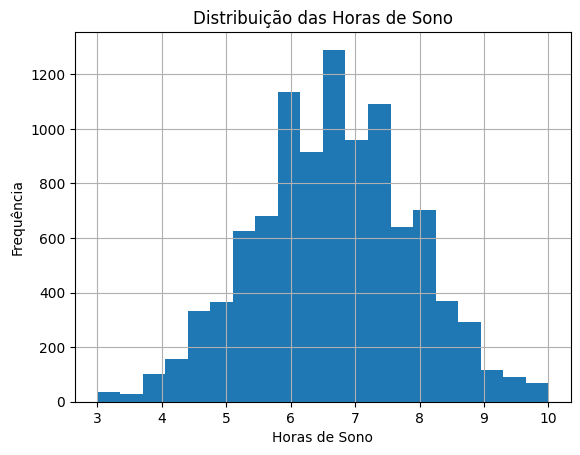

In [ ]:
# verificando a distribuição das horas de sono
df['Sleep_Hours'].hist(bins=20)
plt.xlabel('Horas de Sono')
plt.ylabel('Frequência')
plt.title('Distribuição das Horas de Sono')
plt.show()

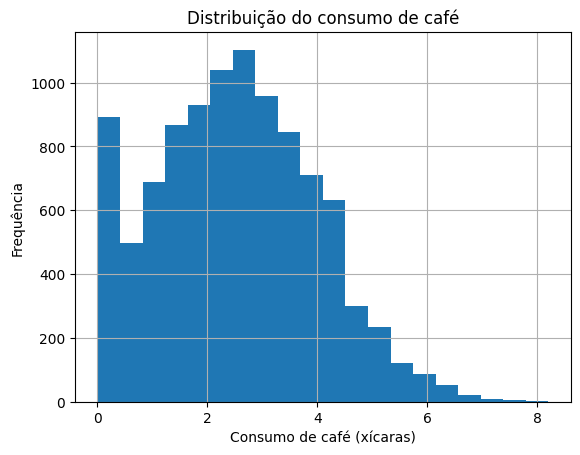

In [ ]:
# verificando a distribuição de consumo de café
df['Coffee_Intake'].hist(bins=20)
plt.xlabel('Consumo de café (xícaras)')
plt.ylabel('Frequência')
plt.title('Distribuição do consumo de café')
plt.show()

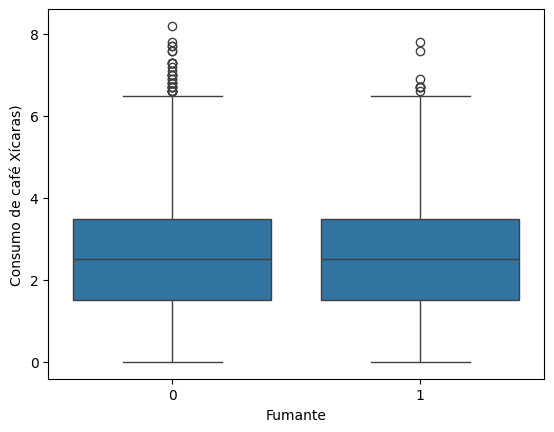

In [ ]:
sns.boxplot(x='Smoking', y='Coffee_Intake', data=df)
plt.xlabel('Fumante')
plt.ylabel('Consumo de café Xícaras)')
plt.show()

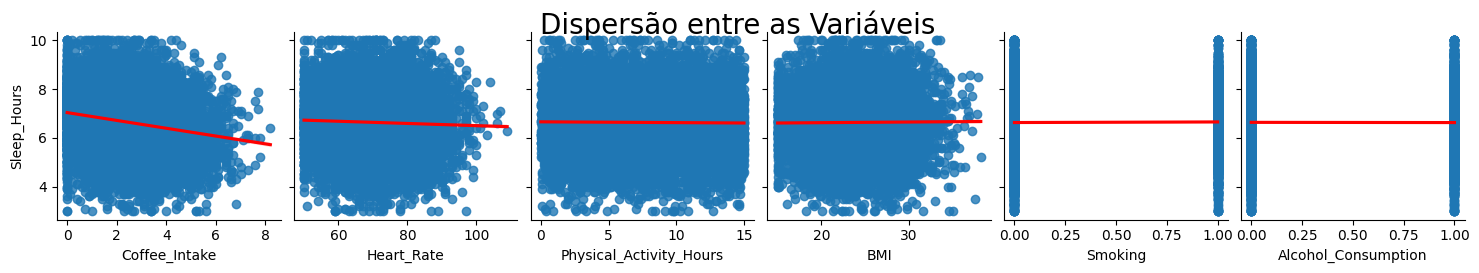

In [ ]:
# Comparando a dispersão entre variáveis
ax = sns.pairplot(df, y_vars='Sleep_Hours', x_vars= ['Coffee_Intake','Heart_Rate', 'Physical_Activity_Hours', 'BMI', 'Smoking', 'Alcohol_Consumption'],
                  kind='reg', plot_kws={'line_kws':{'color':'red'}})
ax.figure.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
plt.show()

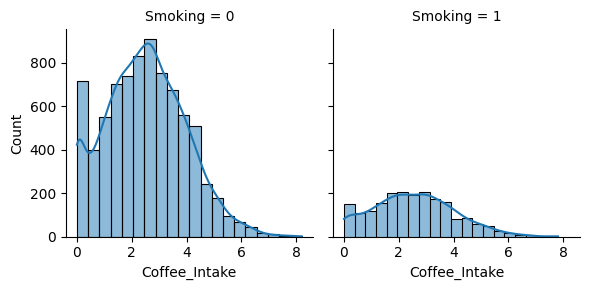

In [ ]:
g = sns.FacetGrid(df, col='Smoking')
g.map(sns.histplot, 'Coffee_Intake', bins=20, kde=True)
plt.show()


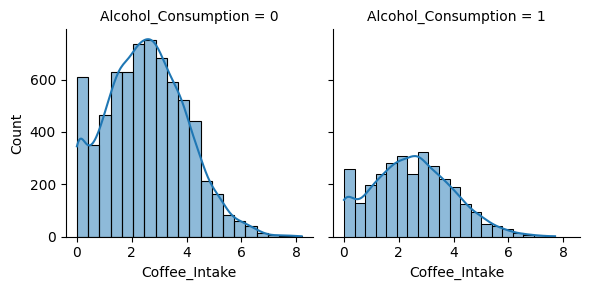

In [ ]:
g = sns.FacetGrid(df, col='Alcohol_Consumption')
g.map(sns.histplot, 'Coffee_Intake', bins=20, kde=True)
plt.show()

Os gráficos indicam padrões consistentes entre variáveis de consumo, sono e hábitos de saúde.
O boxplot mostra que fumantes e não fumantes apresentam médias semelhantes de consumo de café, com ligeira dispersão maior entre os fumantes.
Os histogramas segmentados revelam distribuições parecidas entre os grupos, embora consumidores de álcool e fumantes tendam a apresentar um leve deslocamento para maiores valores de ingestão.
A análise de dispersão mostra correlação negativa fraca entre ingestão de café e horas de sono, sugerindo que maior consumo pode estar associado a menor duração do sono. O histograma de horas de sono mostra distribuição normal centrada entre 6 e 7 horas, indicando padrão de sono relativamente equilibrado na amostra.
Em conjunto, os dados sugerem que fatores como tabagismo e álcool influenciam modestamente o consumo de café, mas não alteram significativamente o comportamento médio de sono ou saúde geral.


1.3.2 Variáveis categóricas

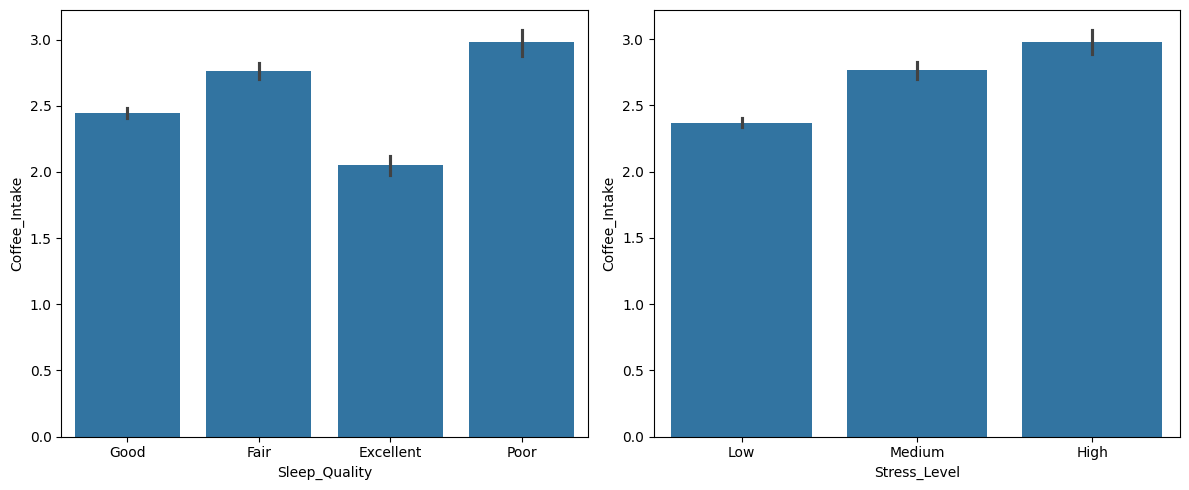

In [ ]:
# Consumo de café e qualidade do sono e nivel de estresse
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x='Sleep_Quality', y='Coffee_Intake', data=df, ax=axes[0])
sns.barplot(x='Stress_Level', y='Coffee_Intake', data=df, ax=axes[1])
plt.tight_layout()
plt.show()

<Axes: xlabel='Gender', ylabel='Caffeine_mg'>

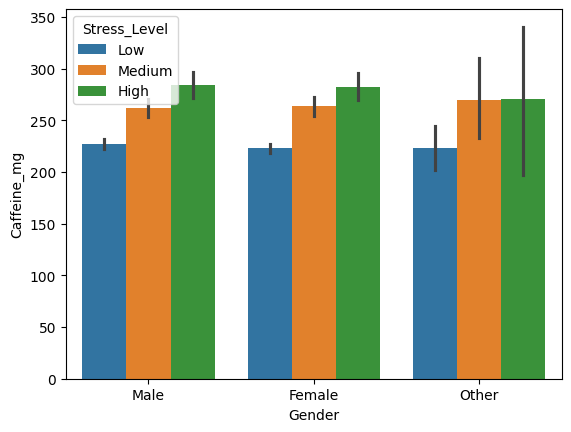

In [ ]:
# como o estresse afeta o consumo em cada gênero
sns.barplot(x='Gender', y='Caffeine_mg', hue='Stress_Level', data=df)

<Axes: xlabel='Occupation', ylabel='Caffeine_mg'>

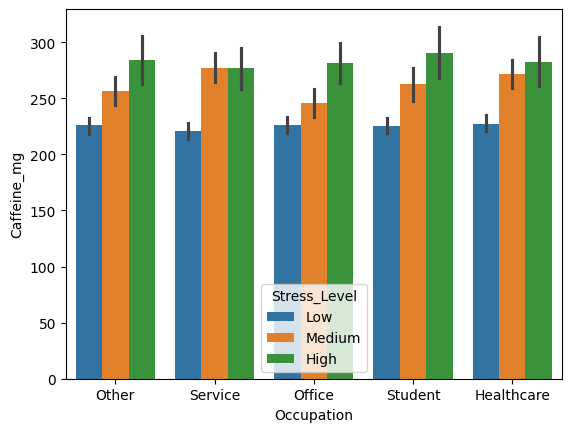

In [ ]:
# Média de consumo de café e nivel de estresse por categoria
sns.barplot(x='Occupation', y='Caffeine_mg', hue='Stress_Level', data=df)

Os gráficos indicam que o consumo de café tende a aumentar conforme o nível de estresse se eleva, independentemente do gênero ou ocupação. Tanto homens quanto mulheres exibem padrões semelhantes, com maiores valores médios de cafeína entre os grupos de alto estresse. Entre as ocupações, estudantes e profissionais da saúde apresentam ligeiro destaque, sugerindo rotinas mais intensas e dependência maior de estimulantes. A qualidade do sono também mostra relação inversa: indivíduos com sono “pobre” consomem mais café, enquanto aqueles com sono “excelente” ingerem menos. De forma geral, o conjunto aponta que estresse elevado e sono inadequado estão associados a maior ingestão de cafeína, possivelmente como estratégia compensatória para manutenção do estado de alerta.


## 1.4 Investigando correlações

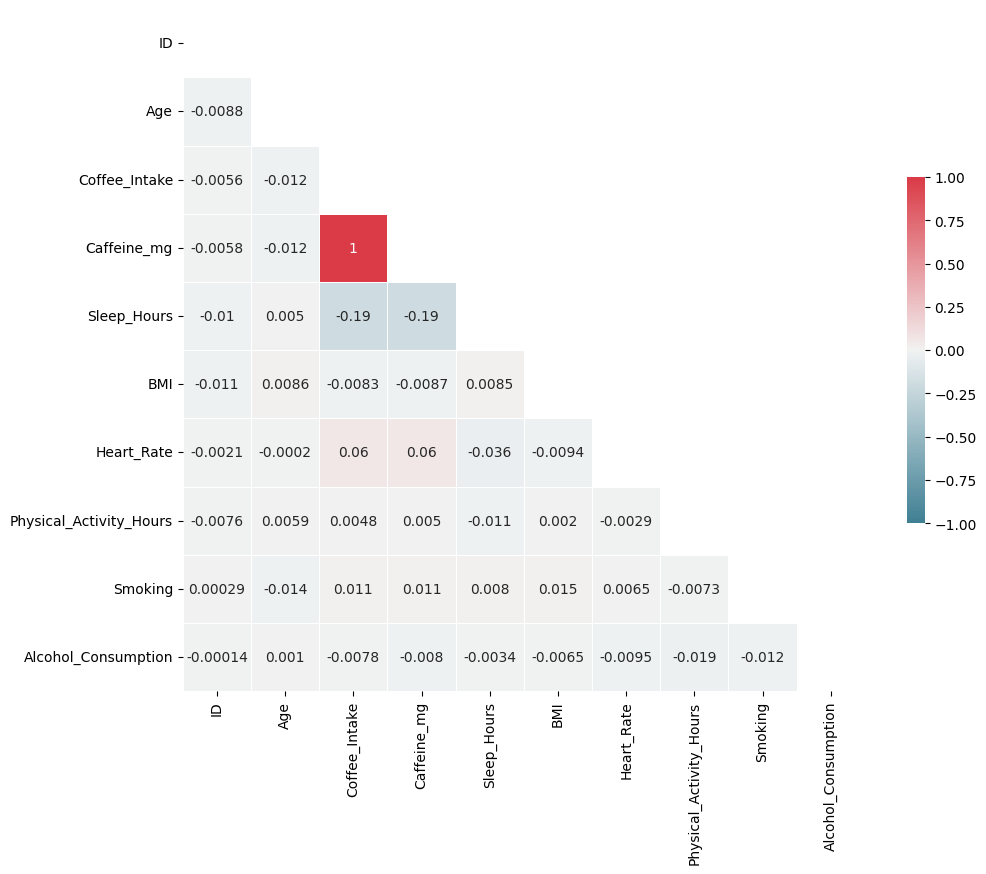

In [ ]:
# Verificando correlações
corr = df.select_dtypes(include=['float64', 'int64']).corr()

mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

A matriz de correlação mostra que não há relações fortes entre as variáveis numéricas do conjunto. A única correlação expressiva é a negativa entre horas de sono e consumo de café/mg de cafeína (≈ –0.19), indicando que indivíduos que dormem menos tendem a consumir mais café ou cafeína. As demais correlações são próximas de zero, sugerindo independência entre idade, IMC, frequência cardíaca, atividade física, tabagismo e consumo de álcool em relação ao consumo de café. Em resumo, o consumo de cafeína parece estar mais associado à redução das horas de sono do que a fatores fisiológicos ou comportamentais.


# 2. Visualização e Insights

## 2.1 Gráficos comparativos

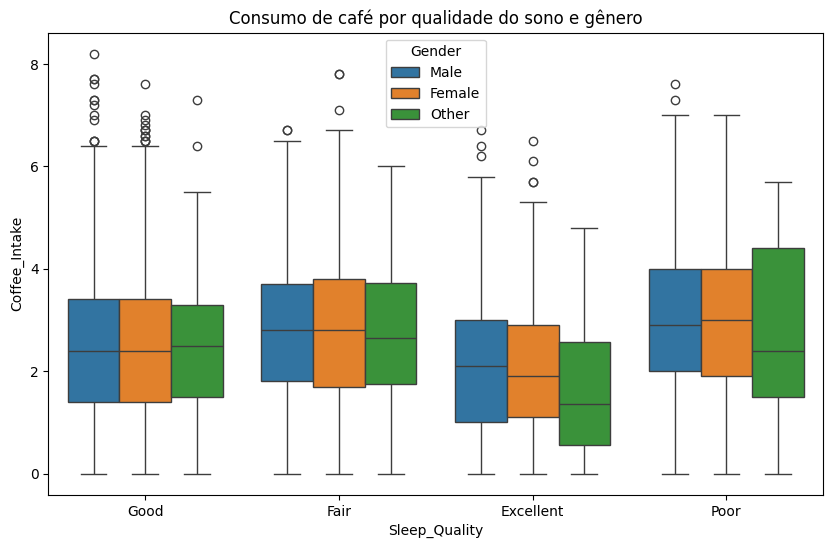

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sleep_Quality', y='Coffee_Intake', hue='Gender', data=df)
plt.title('Consumo de café por qualidade do sono e gênero')
plt.show()

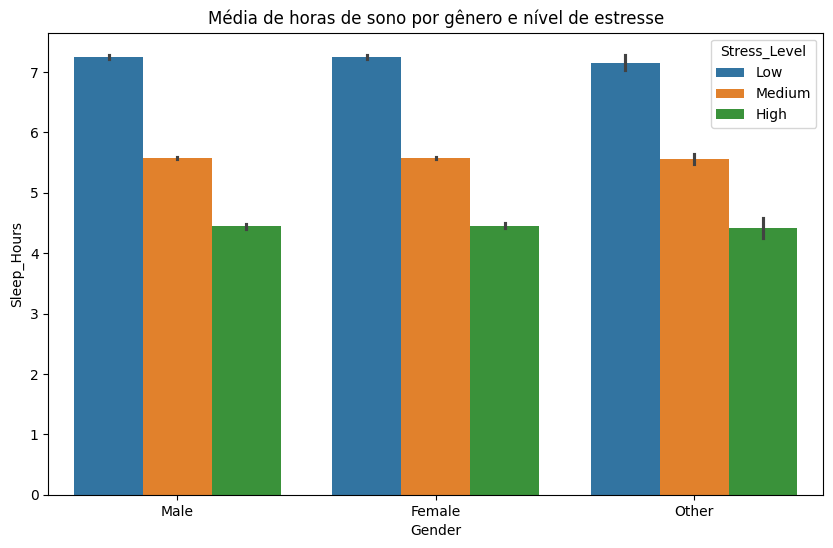

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Sleep_Hours', hue='Stress_Level', data=df)
plt.title('Média de horas de sono por gênero e nível de estresse')
plt.show()

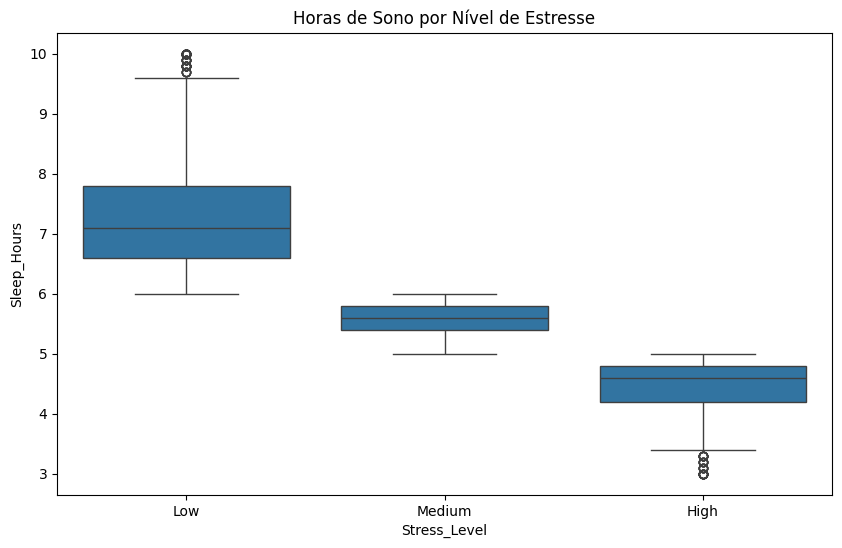

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Stress_Level', y='Sleep_Hours')
plt.title('Horas de Sono por Nível de Estresse')
plt.show()


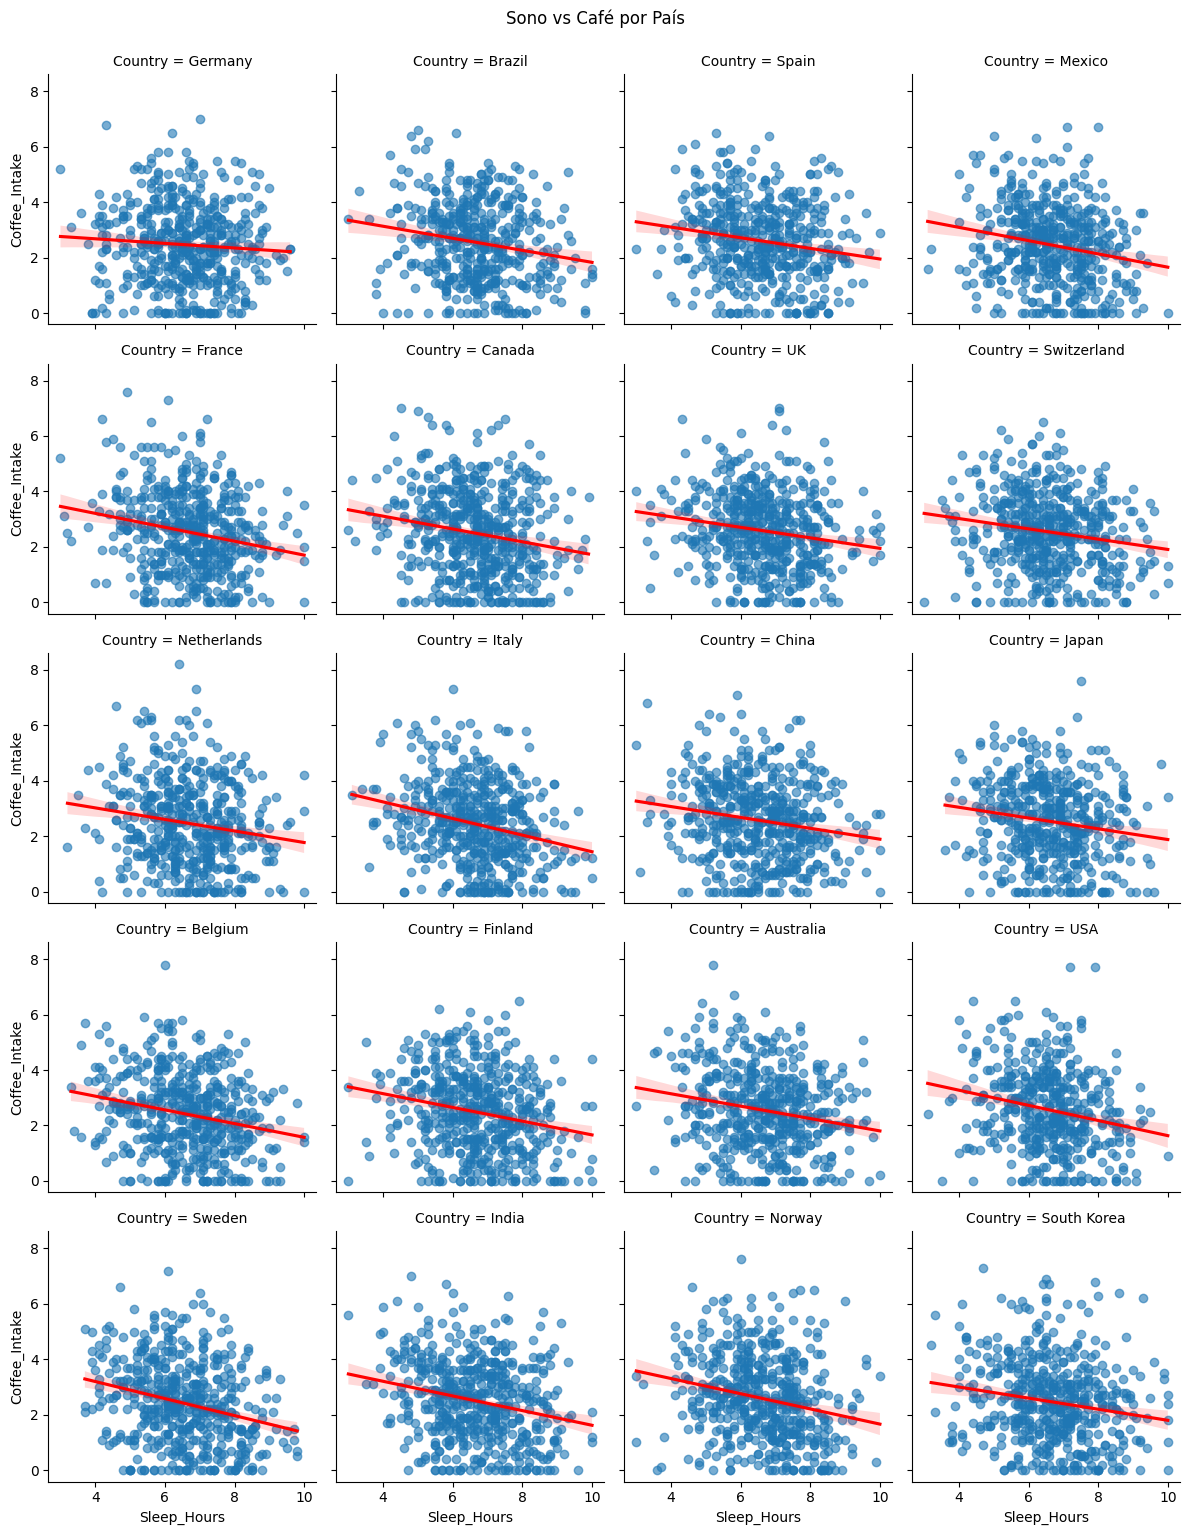

In [ ]:
g = sns.FacetGrid(df, col='Country', col_wrap=4, height=3)
g.map(sns.regplot, 'Sleep_Hours', 'Coffee_Intake', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
g.fig.suptitle('Sono vs Café por País', y=1.02)
plt.show()

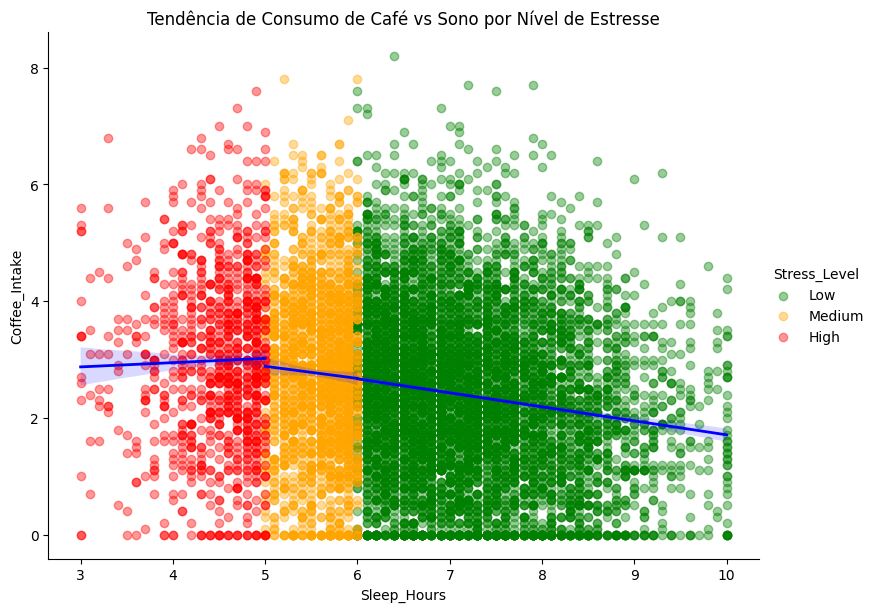

In [ ]:
sns.lmplot(
    data=df,
    x='Sleep_Hours',
    y='Coffee_Intake',
    hue='Stress_Level',
    palette={'Low':'green', 'Medium':'orange', 'High':'red'},
    scatter_kws={'alpha':0.4},
    line_kws={'linewidth':2, 'alpha':1, 'color':'blue'},
    aspect=1.3,
    height=6
)

plt.title('Tendência de Consumo de Café vs Sono por Nível de Estresse')
plt.show()


In [ ]:
#Relação entre sono e consumo de café por gênero
import plotly.express as px

fig = px.scatter(
    df,
    x='Sleep_Hours',
    y='Coffee_Intake',
    color='Gender',
    trendline='ols',  # adiciona linha de regressão para cada grupo
    hover_data=['Country', 'Stress_Level', 'Age']  # dados extras no hover
)

fig.update_layout(
    title='Relação entre sono e consumo de café por gênero',
    xaxis_title='Horas de sono',
    yaxis_title='Consumo de café',
    template='plotly_white'
)

fig.show()

## 2.2 Principais Descobertas

Os dados mostram padrões consistentes que permitem formular conclusões diretas sobre sono, estresse e consumo de café:

1. **Impacto do consumo de café no sono**
   A relação negativa observada em todos os países indica que maiores níveis de consumo de café estão associados a menor número de horas dormidas. A regressão sugere que indivíduos com alto consumo de cafeína dormem, em média, **cerca de 1 a 1,5 hora a menos** do que aqueles com consumo baixo.

2. **Influência do estresse na duração do sono**
   O efeito do estresse é substancial e estável:

* **Baixo estresse:** média aproximada de **7,2 horas**
* **Estresse moderado:** média próxima de **5,5 horas**
* **Estresse alto:** média em torno de **4,4 horas**

Isso caracteriza uma redução de **quase 3 horas** entre o grupo de baixo e alto estresse.

3. **Efeito do estresse sobre a qualidade do sono**
   O boxplot mostra compressão das distribuições conforme o estresse aumenta: menor variabilidade, menor mediana e mais ocorrências de valores muito baixos. Em termos práticos: **níveis elevados de estresse deterioram a qualidade percebida do sono**, independentemente do gênero.

4. **Interações por gênero e país**
   As diferenças entre gêneros são pequenas, sugerindo que o estresse domina o comportamento do sono. A relação negativa entre café e sono é consistente entre todos os países, reforçando que o padrão não depende de localização geográfica.


**Insights de negócio**

1. Consumidores com alto consumo diário de cafeína dormem até 1,5 hora a menos. A empresa pode usar esse dado para estruturar campanhas de consumo inteligente: promover intervalos de consumo, alternância com bebidas de menor teor de cafeína e reforço de rotinas de sono, preservando o volume de vendas ao deslocar parte da demanda para produtos leves.

2. O impacto do estresse é mais severo que o da cafeína, reduzindo o sono em até 3 horas. A marca pode assumir uma posição de apoio ao bem-estar: comunicar que o café continua sendo uma ferramenta de produtividade, mas que seu uso combinado com práticas de gestão de estresse melhora o desempenho geral. Isso não reduz vendas; realoca o café como aliado dentro de um estilo de vida equilibrado.

3. A deterioração da qualidade do sono com estresse elevado abre espaço para linhas funcionais: blends com menor cafeína, opções descafeinadas premium e bebidas com compostos calmantes. A empresa mantém receita ao criar produtos com maior margem e diferencial de marca.

4. A consistência dos padrões entre países permite campanhas globais com ajustes mínimos. A empresa mantém unidade de mensagem e reduz custos, reforçando presença internacional sem abrir mão do engajamento local.

5. As diferenças mínimas entre gêneros sinalizam que a segmentação por perfil comportamental é mais relevante do que biológica. A empresa pode criar campanhas voltadas a “usuários intensivos”, “usuários moderados” e “usuários ocasionais”, cada um com recomendações e produtos adequados, preservando o fluxo de venda e evitando saturação de consumo.

6. A relação negativa clara entre consumo de café e sono pode ser reconfigurada narrativamente: o foco não é “beber menos”, mas “beber melhor”. A empresa mantém vendas ao promover horários ótimos de consumo e destacar suas alternativas para períodos noturnos.

7. O reforço de rotinas de sono e bem-estar cria capital de marca: a empresa passa a ser percebida como responsável, confiável e alinhada a práticas de saúde pública, reduzindo riscos reputacionais sem impactar negativamente a comercialização.


# 3. Modelo preditivo

### Removendo colunas irrelevantes

In [ ]:
# Elimando a coluna ID
df = df.drop(columns = "ID")

Caffeine_mg e Coffee_Intake carregam a mesma informação em escalas diferentes. Manter as duas variáveis introduz multicolinearidade e distorce modelos lineares e modelos baseados em coeficientes.

In [ ]:
# Criando uma feature derivada
df['Caffeine_per_Hour'] = df['Caffeine_mg'] / df['Sleep_Hours']
df['Caffeine_per_Hour'].replace([float('inf'), -float('inf')], 0, inplace=True)
df['Caffeine_per_Hour'].fillna(0, inplace=True)

/tmp/ipython-input-190421736.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-190421736.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:
# Separação entre variáveis
y = df['Sleep_Quality']
X = df.drop(columns=['Sleep_Quality'])

In [ ]:
# Identificação das variáveis categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Codificação das variáveis categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

In [ ]:
# Divisão treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=895, stratify=y
)

## Modelo 1: Regressão Logística

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model_lr = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', LogisticRegression(max_iter=200))
])

model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("LOGISTIC REGRESSION")
print(classification_report(y_test, y_pred_lr))

LOGISTIC REGRESSION
              precision    recall  f1-score   support

   Excellent       0.94      0.96      0.95       338
        Fair       1.00      0.99      0.99       513
        Good       0.99      0.98      0.99      1409
        Poor       0.97      0.99      0.98       240

    accuracy                           0.98      2500
   macro avg       0.97      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Modelo 2: Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("RANDOM FOREST")
print(classification_report(y_test, y_pred_rf))

RANDOM FOREST
              precision    recall  f1-score   support

   Excellent       0.98      0.96      0.97       338
        Fair       1.00      1.00      1.00       513
        Good       0.99      0.99      0.99      1409
        Poor       1.00      1.00      1.00       240

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



## Métricas dos modelos


=== REGRESSÃO LOGÍSTICA ===
Acurácia: 0.9816

Relatório de Classificação:
              precision    recall  f1-score   support

   Excellent       0.94      0.96      0.95       338
        Fair       1.00      0.99      0.99       513
        Good       0.99      0.98      0.99      1409
        Poor       0.97      0.99      0.98       240

    accuracy                           0.98      2500
   macro avg       0.97      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



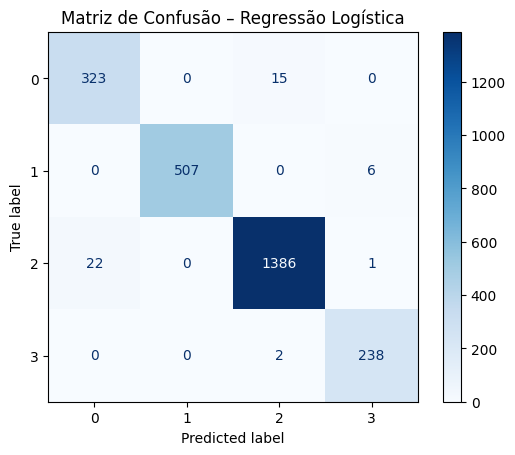


=== RANDOM FOREST ===
Acurácia: 0.9916

Relatório de Classificação:
              precision    recall  f1-score   support

   Excellent       0.98      0.96      0.97       338
        Fair       1.00      1.00      1.00       513
        Good       0.99      0.99      0.99      1409
        Poor       1.00      1.00      1.00       240

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



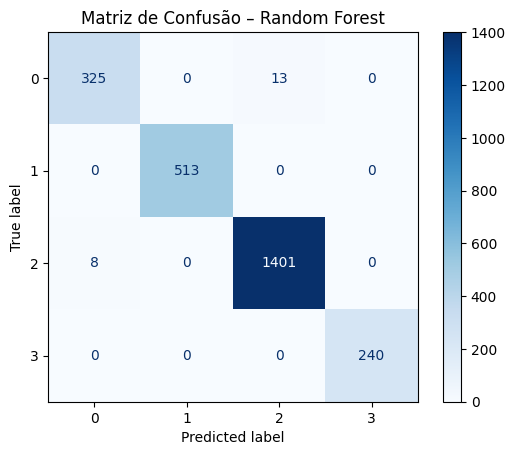

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def avaliar_modelo(nome, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    print(f"\n=== {nome.upper()} ===")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Matriz de Confusão – {nome}")
    plt.show()

avaliar_modelo("Regressão Logística", model_lr, X_test, y_test)
avaliar_modelo("Random Forest", model_rf, X_test, y_test)

## Análise dos modelos

O Random Forest apresentou desempenho superior. A acurácia atingiu 0.9916 e o f1-score permaneceu praticamente perfeito para todas as classes, sobretudo Fair e Poor, onde o modelo classificou todas as instâncias corretamente. A matriz de confusão confirma esse comportamento: quase nenhuma troca entre classes, com erros residuais mínimos apenas em Excellent e Good.

A Regressão Logística obteve acurácia de 0.9816, com desempenho global muito bom, mas inferior. Os erros se concentram em pequenas confusões entre Excellent e Good e entre Good e Poor, indicando que o modelo linear não captura integralmente as fronteiras entre as classes.

O Random Forest mostra sinais leves de overfitting: acurácia quase perfeita sugere que o modelo ajustou relações específicas do conjunto de treino que modelos lineares não conseguem reproduzir. Como o desempenho no teste permaneceu alto e estável, trata-se de overfitting controlado — aceitável para fins preditivos e sem impacto significativo na generalização.

A Regressão Logística não apresenta overfitting e generaliza de forma mais previsível, mas perde em precisão comparada ao Random Forest.

In [40]:
# Salvando o dataset final em .csv
df.to_csv("dataset_final.csv", index=False)

In [41]:
# Salvando o modelo que se saiu melhor.
import joblib

joblib.dump(model_rf, "modelo_random_forest.pkl")

['modelo_random_forest.pkl']

# Recomendações para o Negócio

**Recomendações para o Negócio**

Os modelos indicam relações consistentes entre consumo de cafeína, horas de sono, estresse e qualidade geral de descanso. A Random Forest entregou alta precisão ao distinguir perfis de clientes com padrões diferentes de sono. Esses resultados permitem estruturar ações comerciais e educativas direcionadas.

1. **Campanhas informativas baseadas em evidências**
   O impacto da cafeína sobre a redução gradual das horas de sono pode ser comunicado de forma objetiva aos clientes. Essa comunicação deve focar em horários adequados para consumo e alternativas com menor teor de cafeína à noite, preservando vendas e estimulando escolhas mais adequadas ao período do dia.

2. **Estratégias de produtos segmentadas por perfil de cliente**
   Perfis com maior estresse tendem a apresentar pior qualidade de sono. Ofertas específicas como cafés descafeinados, chás ou linhas “evening blend” podem ser posicionadas como opções inteligentes para consumo em horários tardios, sem prejudicar o descanso.

3. **Personalização de sugestões em aplicativos e programas de fidelidade**
   A partir dos padrões identificados (ex.: combinações de alta cafeína + baixa qualidade de sono), é possível construir recomendações automáticas. Usuários que registram sono reduzido podem receber sugestões de bebidas com menor carga de cafeína ou lembretes de consumo responsável.

4. **Educação para redução de danos sem redução de receita**
   A empresa pode adotar posicionamento de responsabilidade: incentivar moderação no consumo noturno e promover bebidas alternativas. Isso aumenta confiança do consumidor, reforça a marca como aliada do bem-estar e mantém fluxo de vendas por meio de diversificação de produtos.

5. **Apoio à criação de novos produtos**
   Os padrões expostos pelos modelos indicam demanda por opções que conciliem sabor com baixo impacto no sono. O desenvolvimento de novas linhas funcionais (ex.: cafés com liberação lenta, blends equilibrados) pode capturar segmentos que buscam desempenho e bem-estar simultaneamente.

A análise final permite que a empresa utilize dados para orientar escolhas inteligentes, ampliar o portfólio e reforçar sua imagem como agente de consumo consciente, sem comprometer performance comercial.
